**Import Library**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Model**

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [7]:
SEED = 23

**Load DATA**

In [8]:
df = pd.read_csv("fmpnew.csv")
df

,Materials-1,Materials-2,Electrolyte concentration,Electrolyte,ElectrodeConfiguration,Cell Configuration,Voltagewindow,Specific surface area,Pore volume,Pore size,Scan rate,Current density,CycleNumber,Capacitance
0,PVDF,Carbon nanofibre,6.0,KOH,three electrode system,Swagelok,1.0,83.0,0.39,5.23,252.5,0.30,2500,23.55
1,PVDF,Carbon nanofibre,6.0,KOH,three electrode system,Swagelok,1.0,83.0,0.39,5.23,252.5,0.35,2500,22.62
2,PVDF,Carbon nanofibre,6.0,KOH,three electrode system,Swagelok,1.0,83.0,0.39,5.23,252.5,0.40,2500,21.40
3,PVDF,Carbon nanofibre,6.0,KOH,three electrode system,Swagelok,1.0,83.0,0.39,5.23,252.5,0.45,2500,20.80
4,PVDF,Carbon nanofibre,6.0,KOH,three electrode system,Swagelok,1.0,83.0,0.39,5.23,252.5,0.50,2500,20.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,Lemon grass (Cymbopogon Citratus),LG-0.9,1.0,H₂SO₄,two-electrode system,LGs waste supercapacitor cells,0.5,795.0,0.47,2.38,8.0,1.00,6000,59.78
603,Lemon grass (Cymbopogon Citratus),LG-0.9,1.0,H₂SO₄,two-electrode system,LGs waste supercapacitor cells,0.5,795.0,0.47,2.38,8.5,1.00,6000,55.70
604,Lemon grass (Cymbopogon Citratus),LG-0.9,1.0,H₂SO₄,two-electrode system,LGs waste supercapacitor cells,0.5,795.0,0.47,2.38,9.0,1.00,6000,51.29
605,Lemon grass (Cymbopogon Citratus),LG-0.9,1.0,H₂SO₄,two-electrode system,LGs waste supercapacitor cells,0.5,795.0,0.47,2.38,9.5,1.00,6000,46.09


In [9]:
print(df.columns)

Index(['Materials-1', 'Materials-2', 'Electrolyte concentration ',
       'Electrolyte', 'ElectrodeConfiguration', 'Cell Configuration',
       'Voltagewindow ', 'Specific surface area ', 'Pore volume ',
       'Pore size ', 'Scan rate', 'Current density', 'CycleNumber',
       'Capacitance '],
      dtype='object')


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Materials-1                 607 non-null    object 
 1   Materials-2                 607 non-null    object 
 2   Electrolyte concentration   607 non-null    float64
 3   Electrolyte                 607 non-null    object 
 4   ElectrodeConfiguration      607 non-null    object 
 5   Cell Configuration          607 non-null    object 
 6   Voltagewindow               607 non-null    float64
 7   Specific surface area       607 non-null    float64
 8   Pore volume                 607 non-null    float64
 9   Pore size                   607 non-null    float64
 10  Scan rate                   607 non-null    float64
 11  Current density             607 non-null    float64
 12  CycleNumber                 607 non-null    int64  
 13  Capacitance                 607 non

**Checking for Null Values**

In [11]:
df.isnull()

,Materials-1,Materials-2,Electrolyte concentration,Electrolyte,ElectrodeConfiguration,Cell Configuration,Voltagewindow,Specific surface area,Pore volume,Pore size,Scan rate,Current density,CycleNumber,Capacitance
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,False,False,False,False,False,False,False,False,False,False,False,False,False,False
603,False,False,False,False,False,False,False,False,False,False,False,False,False,False
604,False,False,False,False,False,False,False,False,False,False,False,False,False,False
605,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

,0
Materials-1,0
Materials-2,0
Electrolyte concentration,0
Electrolyte,0
ElectrodeConfiguration,0
Cell Configuration,0
Voltagewindow,0
Specific surface area,0
Pore volume,0
Pore size,0


In [13]:
df.isnull().sum().sum()

0

In [14]:
df = df.fillna(value = 0)
df

,Materials-1,Materials-2,Electrolyte concentration,Electrolyte,ElectrodeConfiguration,Cell Configuration,Voltagewindow,Specific surface area,Pore volume,Pore size,Scan rate,Current density,CycleNumber,Capacitance
0,PVDF,Carbon nanofibre,6.0,KOH,three electrode system,Swagelok,1.0,83.0,0.39,5.23,252.5,0.30,2500,23.55
1,PVDF,Carbon nanofibre,6.0,KOH,three electrode system,Swagelok,1.0,83.0,0.39,5.23,252.5,0.35,2500,22.62
2,PVDF,Carbon nanofibre,6.0,KOH,three electrode system,Swagelok,1.0,83.0,0.39,5.23,252.5,0.40,2500,21.40
3,PVDF,Carbon nanofibre,6.0,KOH,three electrode system,Swagelok,1.0,83.0,0.39,5.23,252.5,0.45,2500,20.80
4,PVDF,Carbon nanofibre,6.0,KOH,three electrode system,Swagelok,1.0,83.0,0.39,5.23,252.5,0.50,2500,20.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,Lemon grass (Cymbopogon Citratus),LG-0.9,1.0,H₂SO₄,two-electrode system,LGs waste supercapacitor cells,0.5,795.0,0.47,2.38,8.0,1.00,6000,59.78
603,Lemon grass (Cymbopogon Citratus),LG-0.9,1.0,H₂SO₄,two-electrode system,LGs waste supercapacitor cells,0.5,795.0,0.47,2.38,8.5,1.00,6000,55.70
604,Lemon grass (Cymbopogon Citratus),LG-0.9,1.0,H₂SO₄,two-electrode system,LGs waste supercapacitor cells,0.5,795.0,0.47,2.38,9.0,1.00,6000,51.29
605,Lemon grass (Cymbopogon Citratus),LG-0.9,1.0,H₂SO₄,two-electrode system,LGs waste supercapacitor cells,0.5,795.0,0.47,2.38,9.5,1.00,6000,46.09


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Materials-1                 607 non-null    object 
 1   Materials-2                 607 non-null    object 
 2   Electrolyte concentration   607 non-null    float64
 3   Electrolyte                 607 non-null    object 
 4   ElectrodeConfiguration      607 non-null    object 
 5   Cell Configuration          607 non-null    object 
 6   Voltagewindow               607 non-null    float64
 7   Specific surface area       607 non-null    float64
 8   Pore volume                 607 non-null    float64
 9   Pore size                   607 non-null    float64
 10  Scan rate                   607 non-null    float64
 11  Current density             607 non-null    float64
 12  CycleNumber                 607 non-null    int64  
 13  Capacitance                 607 non

In [16]:
df.describe()

,Electrolyte concentration,Voltagewindow,Specific surface area,Pore volume,Pore size,Scan rate,Current density,CycleNumber,Capacitance
count,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000
mean,4.548600,0.428666,642.992455,0.821005,26.772685,49.696870,6.891186,4384.019769,216.132026
std,2.161131,0.300223,378.417687,0.631150,47.104871,57.754562,5.148718,7054.487956,259.186348
min,1.000000,-0.500000,35.350000,0.150000,1.710000,0.500000,0.300000,100.000000,18.470000
25%,2.000000,0.500000,451.660000,0.350000,2.400000,10.000000,2.900000,100.000000,85.550000
50%,6.000000,0.500000,551.320000,0.800000,6.400000,55.000000,5.500000,2500.000000,119.060000
75%,6.000000,0.500000,764.920000,0.900000,10.400000,55.000000,9.550000,5000.000000,167.540000
max,6.000000,1.000000,1694.000000,2.350000,135.000000,252.500000,19.800000,30000.000000,1093.060000


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Electrolyte concentration,607.0,4.548600,2.161131,1.00,2.00,6.00,6.00,6.00
Voltagewindow,607.0,0.428666,0.300223,-0.50,0.50,0.50,0.50,1.00
Specific surface area,607.0,642.992455,378.417687,35.35,451.66,551.32,764.92,1694.00
Pore volume,607.0,0.821005,0.631150,0.15,0.35,0.80,0.90,2.35
Pore size,607.0,26.772685,47.104871,1.71,2.40,6.40,10.40,135.00
Scan rate,607.0,49.696870,57.754562,0.50,10.00,55.00,55.00,252.50
Current density,607.0,6.891186,5.148718,0.30,2.90,5.50,9.55,19.80
CycleNumber,607.0,4384.019769,7054.487956,100.00,100.00,2500.00,5000.00,30000.00
Capacitance,607.0,216.132026,259.186348,18.47,85.55,119.06,167.54,1093.06


In [18]:

from sklearn.preprocessing import OneHotEncoder
import pandas as pd
categorical_cols = ['Materials-1', 'Materials-2', 'Electrolyte', 'ElectrodeConfiguration', 'Cell Configuration']
df = pd.get_dummies(df, columns=categorical_cols)
df = df.astype(int)

In [19]:
df

,Electrolyte concentration,Voltagewindow,Specific surface area,Pore volume,Pore size,Scan rate,Current density,CycleNumber,Capacitance,Materials-1_(B2O3),...,ElectrodeConfiguration_three-electrode system,ElectrodeConfiguration_two symmetric CNF,ElectrodeConfiguration_two-electrode system,Cell Configuration_CR2032 button-type cells,Cell Configuration_HPCNF/ Supercacitor cell,Cell Configuration_LGs waste supercapacitor cells,Cell Configuration_NiCoO₂@PPy@CNF,Cell Configuration_SPD-PCNF/supercapacitor cells,Cell Configuration_Swagelok,Cell Configuration_Symmetric supercapacitor cells
0,6,1,83,0,5,252,0,2500,23,0,...,0,0,0,0,0,0,0,0,1,0
1,6,1,83,0,5,252,0,2500,22,0,...,0,0,0,0,0,0,0,0,1,0
2,6,1,83,0,5,252,0,2500,21,0,...,0,0,0,0,0,0,0,0,1,0
3,6,1,83,0,5,252,0,2500,20,0,...,0,0,0,0,0,0,0,0,1,0
4,6,1,83,0,5,252,0,2500,20,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,1,0,795,0,2,8,1,6000,59,0,...,0,0,1,0,0,1,0,0,0,0
603,1,0,795,0,2,8,1,6000,55,0,...,0,0,1,0,0,1,0,0,0,0
604,1,0,795,0,2,9,1,6000,51,0,...,0,0,1,0,0,1,0,0,0,0
605,1,0,795,0,2,9,1,6000,46,0,...,0,0,1,0,0,1,0,0,0,0


**Input and Output Preparation**

In [20]:
X = df.drop(['Capacitance '],axis = 1)
X

,Electrolyte concentration,Voltagewindow,Specific surface area,Pore volume,Pore size,Scan rate,Current density,CycleNumber,Materials-1_(B2O3),Materials-1_Carbonized,...,ElectrodeConfiguration_three-electrode system,ElectrodeConfiguration_two symmetric CNF,ElectrodeConfiguration_two-electrode system,Cell Configuration_CR2032 button-type cells,Cell Configuration_HPCNF/ Supercacitor cell,Cell Configuration_LGs waste supercapacitor cells,Cell Configuration_NiCoO₂@PPy@CNF,Cell Configuration_SPD-PCNF/supercapacitor cells,Cell Configuration_Swagelok,Cell Configuration_Symmetric supercapacitor cells
0,6,1,83,0,5,252,0,2500,0,0,...,0,0,0,0,0,0,0,0,1,0
1,6,1,83,0,5,252,0,2500,0,0,...,0,0,0,0,0,0,0,0,1,0
2,6,1,83,0,5,252,0,2500,0,0,...,0,0,0,0,0,0,0,0,1,0
3,6,1,83,0,5,252,0,2500,0,0,...,0,0,0,0,0,0,0,0,1,0
4,6,1,83,0,5,252,0,2500,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,1,0,795,0,2,8,1,6000,0,0,...,0,0,1,0,0,1,0,0,0,0
603,1,0,795,0,2,8,1,6000,0,0,...,0,0,1,0,0,1,0,0,0,0
604,1,0,795,0,2,9,1,6000,0,0,...,0,0,1,0,0,1,0,0,0,0
605,1,0,795,0,2,9,1,6000,0,0,...,0,0,1,0,0,1,0,0,0,0


In [21]:
Y = df['Capacitance ']
Y

,Capacitance
0,23
1,22
2,21
3,20
4,20
...,...
602,59
603,55
604,51
605,46


In [22]:
X.shape

(607, 52)

In [23]:
Y.shape

(607,)

In [24]:
corr = df.corr()


In [25]:
corr

,Electrolyte concentration,Voltagewindow,Specific surface area,Pore volume,Pore size,Scan rate,Current density,CycleNumber,Capacitance,Materials-1_(B2O3),...,ElectrodeConfiguration_three-electrode system,ElectrodeConfiguration_two symmetric CNF,ElectrodeConfiguration_two-electrode system,Cell Configuration_CR2032 button-type cells,Cell Configuration_HPCNF/ Supercacitor cell,Cell Configuration_LGs waste supercapacitor cells,Cell Configuration_NiCoO₂@PPy@CNF,Cell Configuration_SPD-PCNF/supercapacitor cells,Cell Configuration_Swagelok,Cell Configuration_Symmetric supercapacitor cells
Electrolyte concentration,1.000000,0.166265,-0.296852,0.326773,0.330084,0.499731,0.376243,-0.079412,-0.534380,0.291333,...,-0.439775,0.526837,-0.308918,0.173700,0.192469,-0.529042,-0.439775,0.234767,0.166265,0.186860
Voltagewindow,0.166265,1.000000,-0.366143,-0.120259,-0.112795,0.868484,-0.285261,-0.066117,-0.187806,-0.107216,...,-0.092170,-0.193887,-0.106552,-0.063925,-0.070833,-0.079633,-0.092170,-0.086399,1.000000,-0.237377
Specific surface area,-0.296852,-0.366143,1.000000,0.010737,-0.162375,-0.616432,0.072664,-0.201885,-0.138541,-0.160068,...,-0.210534,-0.208618,-0.002079,-0.378074,-0.055762,0.311394,-0.210534,0.573583,-0.366143,-0.017642
Pore volume,0.326773,-0.120259,0.010737,1.000000,0.904760,-0.016251,0.335021,-0.237692,-0.157803,0.893834,...,-0.181148,0.449045,-0.209415,-0.125637,-0.139213,-0.156509,-0.181148,0.097221,-0.120259,0.340222
Pore size,0.330084,-0.112795,-0.162375,0.904760,1.000000,0.052507,0.325556,-0.235940,-0.148977,0.996712,...,-0.162006,0.562552,-0.187287,-0.079495,-0.154850,-0.167265,-0.162006,-0.107442,-0.112795,0.443925
Scan rate,0.499731,0.868484,-0.616432,-0.016251,0.052507,1.000000,-0.153307,0.105855,-0.351139,0.046321,...,-0.256117,0.077557,-0.033353,0.248279,0.026721,-0.247735,-0.256117,-0.240082,0.868484,-0.077790
Current density,0.376243,-0.285261,0.072664,0.335021,0.325556,-0.153307,1.000000,-0.177430,-0.139161,0.303123,...,-0.120749,0.419548,-0.321662,-0.063601,-0.079130,-0.347843,-0.120749,0.223358,-0.285261,0.348862
CycleNumber,-0.079412,-0.066117,-0.201885,-0.237692,-0.235940,0.105855,-0.177430,1.000000,0.049298,-0.263432,...,0.015775,-0.476383,0.685420,0.939159,-0.096850,0.073805,0.015775,0.030523,-0.066117,-0.445693
Capacitance,-0.534380,-0.187806,-0.138541,-0.157803,-0.148977,-0.351139,-0.139161,0.049298,1.000000,-0.144772,...,0.964320,-0.296807,-0.175581,-0.070233,-0.129410,-0.160377,0.964320,-0.175837,-0.187806,-0.238102
Materials-1_(B2O3),0.291333,-0.107216,-0.160068,0.893834,0.996712,0.046321,0.303123,-0.263432,-0.144772,1.000000,...,-0.161502,0.552985,-0.186703,-0.112011,-0.124115,-0.139534,-0.161502,-0.151390,-0.107216,0.451671


In [26]:

corr.style.background_gradient(cmap='coolwarm')

,Electrolyte concentration,Voltagewindow,Specific surface area,Pore volume,Pore size,Scan rate,Current density,CycleNumber,Capacitance,Materials-1_(B2O3),Materials-1_Carbonized,Materials-1_Lemon grass (Cymbopogon Citratus),"Materials-1_Ni, Co","Materials-1_Nitrogen, Sulphur",Materials-1_Nypa fruticans (NF) fruit,Materials-1_PAN,Materials-1_PAN/Graphene,Materials-1_PVDF,Materials-2_BCNF-10,Materials-2_BCNF-20,Materials-2_BCNF-5,Materials-2_CNF(NFF-01),Materials-2_CNF(NFF-03),Materials-2_CNF(NFF-05),Materials-2_CNF(PG800),Materials-2_CNF(PMG1000),Materials-2_CNF(PMG800),Materials-2_Carbon nanofibre,Materials-2_HPCNF,Materials-2_LG-0.5,Materials-2_LG-0.7,Materials-2_LG-0.9,Materials-2_N/S-CNF10,Materials-2_N/S-CNF5,Materials-2_NiCoO2@APPy,Materials-2_PCNF,Materials-2_SPD-PCNF,Electrolyte_ H₂SO₄,Electrolyte_H2SO4,Electrolyte_KOH,ElectrodeConfiguration_asymmetric electrodes,ElectrodeConfiguration_symmetrical two-electrode configuration,ElectrodeConfiguration_three electrode system,ElectrodeConfiguration_three-electrode system,ElectrodeConfiguration_two symmetric CNF,ElectrodeConfiguration_two-electrode system,Cell Configuration_CR2032 button-type cells,Cell Configuration_HPCNF/ Supercacitor cell,Cell Configuration_LGs waste supercapacitor cells,Cell Configuration_NiCoO₂@PPy@CNF,Cell Configuration_SPD-PCNF/supercapacitor cells,Cell Configuration_Swagelok,Cell Configuration_Symmetric supercapacitor cells
Electrolyte concentration,1.000000,0.166265,-0.296852,0.326773,0.330084,0.499731,0.376243,-0.079412,-0.534380,0.291333,0.303856,-0.529042,-0.439775,0.173700,-0.544272,0.319721,0.158564,0.166265,0.158564,0.158564,0.158564,-0.303340,-0.303340,-0.303340,0.158564,0.203569,0.205740,0.166265,0.192469,-0.295408,-0.295408,-0.295408,0.120824,0.120824,-0.439775,0.161163,0.161163,-0.529042,-0.544272,0.803024,0.234767,-0.544272,0.263763,-0.439775,0.526837,-0.308918,0.173700,0.192469,-0.529042,-0.439775,0.234767,0.166265,0.186860
Voltagewindow,0.166265,1.000000,-0.366143,-0.120259,-0.112795,0.868484,-0.285261,-0.066117,-0.187806,-0.107216,-0.111825,-0.079633,-0.092170,-0.063925,-0.081925,-0.117664,-0.058355,1.000000,-0.058355,-0.058355,-0.058355,-0.045660,-0.045660,-0.045660,-0.058355,-0.074918,-0.075717,1.000000,-0.070833,-0.044466,-0.044466,-0.044466,-0.044466,-0.044466,-0.092170,-0.059311,-0.059311,-0.079633,-0.081925,0.120873,-0.086399,-0.081925,0.630357,-0.092170,-0.193887,-0.106552,-0.063925,-0.070833,-0.079633,-0.092170,-0.086399,1.000000,-0.237377
Specific surface area,-0.296852,-0.366143,1.000000,0.010737,-0.162375,-0.616432,0.072664,-0.201885,-0.138541,-0.160068,-0.052719,0.311394,-0.210534,-0.378074,0.309846,0.422271,-0.103344,-0.366143,-0.100848,-0.040947,-0.119567,0.059258,0.286768,0.172036,-0.103344,0.003505,-0.074180,-0.366143,-0.055762,-0.050695,0.499878,0.072447,-0.288896,-0.237072,-0.210534,0.359190,0.428316,0.311394,0.309846,-0.464706,0.573583,0.309846,-0.294382,-0.210534,-0.208618,-0.002079,-0.378074,-0.055762,0.311394,-0.210534,0.573583,-0.366143,-0.017642
Pore volume,0.326773,-0.120259,0.010737,1.000000,0.904760,-0.016251,0.335021,-0.237692,-0.157803,0.893834,-0.219779,-0.156509,-0.181148,-0.125637,-0.161014,-0.016957,-0.114689,-0.120259,0.606724,0.606724,0.246018,-0.089738,-0.089738,-0.089738,-0.114689,-0.147241,-0.148812,-0.120259,-0.139213,-0.087392,-0.087392,-0.087392,-0.087392,-0.087392,-0.181148,-0.116569,0.250050,-0.156509,-0.161014,0.237562,0.097221,-0.161014,-0.190779,-0.181148,0.449045,-0.209415,-0.125637,-0.139213,-0.156509,-0.181148,0.097221,-0.120259,0.340222
Pore size,0.330084,-0.112795,-0.162375,0.904760,1.000000,0.052507,0.325556,-0.235940,-0.148977,0.996712,-0.177204,-0.167265,-0.162006,-0.079495,-0.172080,-0.191873,-0.107571,-0.112795,0.542482,0.542482,0.542482,-0.095906,-0.095906,-0.095906,-0.107571,-0.131682,-0.107134,-0.112795,-0.154850,-0.093398,-0.093398,-0.093398,-0.036244,-0.074347,-0.162006,-0.083922,-0.063592,-0.167265,-0.172080,0.253889,-0.107442,-0.172080,-0.197833,-0.162006,0.562552,-0.187287,-0

In [27]:
df.columns

Index(['Electrolyte concentration ', 'Voltagewindow ',
       'Specific surface area ', 'Pore volume ', 'Pore size ', 'Scan rate',
       'Current density', 'CycleNumber', 'Capacitance ', 'Materials-1_(B2O3)',
       'Materials-1_Carbonized',
       'Materials-1_Lemon grass  (Cymbopogon Citratus)', 'Materials-1_Ni, Co',
       'Materials-1_Nitrogen, Sulphur',
       'Materials-1_Nypa fruticans (NF) fruit', 'Materials-1_PAN',
       'Materials-1_PAN/Graphene', 'Materials-1_PVDF', 'Materials-2_BCNF-10',
       'Materials-2_BCNF-20', 'Materials-2_BCNF-5', 'Materials-2_CNF(NFF-01)',
       'Materials-2_CNF(NFF-03)', 'Materials-2_CNF(NFF-05)',
       'Materials-2_CNF(PG800)', 'Materials-2_CNF(PMG1000)',
       'Materials-2_CNF(PMG800)', 'Materials-2_Carbon nanofibre',
       'Materials-2_HPCNF', 'Materials-2_LG-0.5', 'Materials-2_LG-0.7',
       'Materials-2_LG-0.9', 'Materials-2_N/S-CNF10', 'Materials-2_N/S-CNF5',
       'Materials-2_NiCoO2@APPy', 'Materials-2_PCNF', 'Materials-2_SPD-PCNF'

In [28]:
columns_to_keep = ['Electrolyte concentration ', 'Voltagewindow ',
       'Specific surface area ', 'Pore volume ', 'Pore size ', 'Scan rate',
       'Current density', 'CycleNumber', 'Capacitance ']
df_n = df[columns_to_keep]
df_n

,Electrolyte concentration,Voltagewindow,Specific surface area,Pore volume,Pore size,Scan rate,Current density,CycleNumber,Capacitance
0,6,1,83,0,5,252,0,2500,23
1,6,1,83,0,5,252,0,2500,22
2,6,1,83,0,5,252,0,2500,21
3,6,1,83,0,5,252,0,2500,20
4,6,1,83,0,5,252,0,2500,20
...,...,...,...,...,...,...,...,...,...
602,1,0,795,0,2,8,1,6000,59
603,1,0,795,0,2,8,1,6000,55
604,1,0,795,0,2,9,1,6000,51
605,1,0,795,0,2,9,1,6000,46


In [29]:
corr = df_n.corr()
corr.style.background_gradient(cmap='coolwarm')


,Electrolyte concentration,Voltagewindow,Specific surface area,Pore volume,Pore size,Scan rate,Current density,CycleNumber,Capacitance
Electrolyte concentration,1.000000,0.166265,-0.296852,0.326773,0.330084,0.499731,0.376243,-0.079412,-0.534380
Voltagewindow,0.166265,1.000000,-0.366143,-0.120259,-0.112795,0.868484,-0.285261,-0.066117,-0.187806
Specific surface area,-0.296852,-0.366143,1.000000,0.010737,-0.162375,-0.616432,0.072664,-0.201885,-0.138541
Pore volume,0.326773,-0.120259,0.010737,1.000000,0.904760,-0.016251,0.335021,-0.237692,-0.157803
Pore size,0.330084,-0.112795,-0.162375,0.904760,1.000000,0.052507,0.325556,-0.235940,-0.148977
Scan rate,0.499731,0.868484,-0.616432,-0.016251,0.052507,1.000000,-0.153307,0.105855,-0.351139
Current density,0.376243,-0.285261,0.072664,0.335021,0.325556,-0.153307,1.000000,-0.177430,-0.139161
CycleNumber,-0.079412,-0.066117,-0.201885,-0.237692,-0.235940,0.105855,-0.177430,1.000000,0.049298
Capacitance,-0.534380,-0.187806,-0.138541,-0.157803,-0.148977,-0.351139,-0.139161,0.049298,1.000000


**Train Test Split**

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=SEED)

In [31]:
print(X_train.shape,X_test.shape, Y_train.shape, Y_test.shape)

(485, 52) (122, 52) (485,) (122,)


In [32]:
X_train

,Electrolyte concentration,Voltagewindow,Specific surface area,Pore volume,Pore size,Scan rate,Current density,CycleNumber,Materials-1_(B2O3),Materials-1_Carbonized,...,ElectrodeConfiguration_three-electrode system,ElectrodeConfiguration_two symmetric CNF,ElectrodeConfiguration_two-electrode system,Cell Configuration_CR2032 button-type cells,Cell Configuration_HPCNF/ Supercacitor cell,Cell Configuration_LGs waste supercapacitor cells,Cell Configuration_NiCoO₂@PPy@CNF,Cell Configuration_SPD-PCNF/supercapacitor cells,Cell Configuration_Swagelok,Cell Configuration_Symmetric supercapacitor cells
172,6,0,451,1,135,55,2,100,1,0,...,0,1,0,0,0,0,0,0,0,1
257,6,0,577,2,135,55,15,100,1,0,...,0,1,0,0,0,0,0,0,0,1
326,6,0,1209,0,10,10,0,5000,0,0,...,0,0,0,0,0,0,0,1,0,0
195,6,0,451,1,135,55,16,100,1,0,...,0,1,0,0,0,0,0,0,0,1
546,2,0,429,0,6,10,5,6580,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,6,0,577,2,135,55,3,100,1,0,...,0,1,0,0,0,0,0,0,0,1
31,6,1,83,0,5,252,1,2500,0,0,...,0,0,0,0,0,0,0,0,1,0
488,2,0,429,0,6,10,5,7000,0,0,...,1,0,0,0,0,0,1,0,0,0
40,6,0,477,0,5,55,4,100,0,0,...,0,1,0,0,0,0,0,0,0,1


In [33]:
Y_train

,Capacitance
172,132
257,142
326,71
195,86
546,849
...,...
237,174
31,18
488,879
40,84


In [34]:
X_test

,Electrolyte concentration,Voltagewindow,Specific surface area,Pore volume,Pore size,Scan rate,Current density,CycleNumber,Materials-1_(B2O3),Materials-1_Carbonized,...,ElectrodeConfiguration_three-electrode system,ElectrodeConfiguration_two symmetric CNF,ElectrodeConfiguration_two-electrode system,Cell Configuration_CR2032 button-type cells,Cell Configuration_HPCNF/ Supercacitor cell,Cell Configuration_LGs waste supercapacitor cells,Cell Configuration_NiCoO₂@PPy@CNF,Cell Configuration_SPD-PCNF/supercapacitor cells,Cell Configuration_Swagelok,Cell Configuration_Symmetric supercapacitor cells
73,6,0,647,0,6,55,4,100,0,1,...,0,1,0,0,0,0,0,0,0,1
74,6,0,647,0,6,55,5,100,0,1,...,0,1,0,0,0,0,0,0,0,1
45,6,0,477,0,5,55,7,100,0,0,...,0,1,0,0,0,0,0,0,0,1
271,1,0,764,0,2,3,5,5000,0,0,...,0,0,0,0,0,0,0,0,0,1
196,6,0,451,1,135,55,16,100,1,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,1,0,1230,0,2,8,5,5000,0,0,...,0,0,0,0,0,0,0,0,0,1
414,6,0,35,0,17,105,2,30000,0,0,...,0,0,1,1,0,0,0,0,0,0
335,6,0,1209,0,10,10,6,5000,0,0,...,0,0,0,0,0,0,0,1,0,0
352,6,0,1209,0,10,10,16,5000,0,0,...,0,0,0,0,0,0,0,1,0,0


In [35]:
Y_test

,Capacitance
73,119
74,117
45,78
271,255
196,85
...,...
301,280
414,126
335,56
352,43


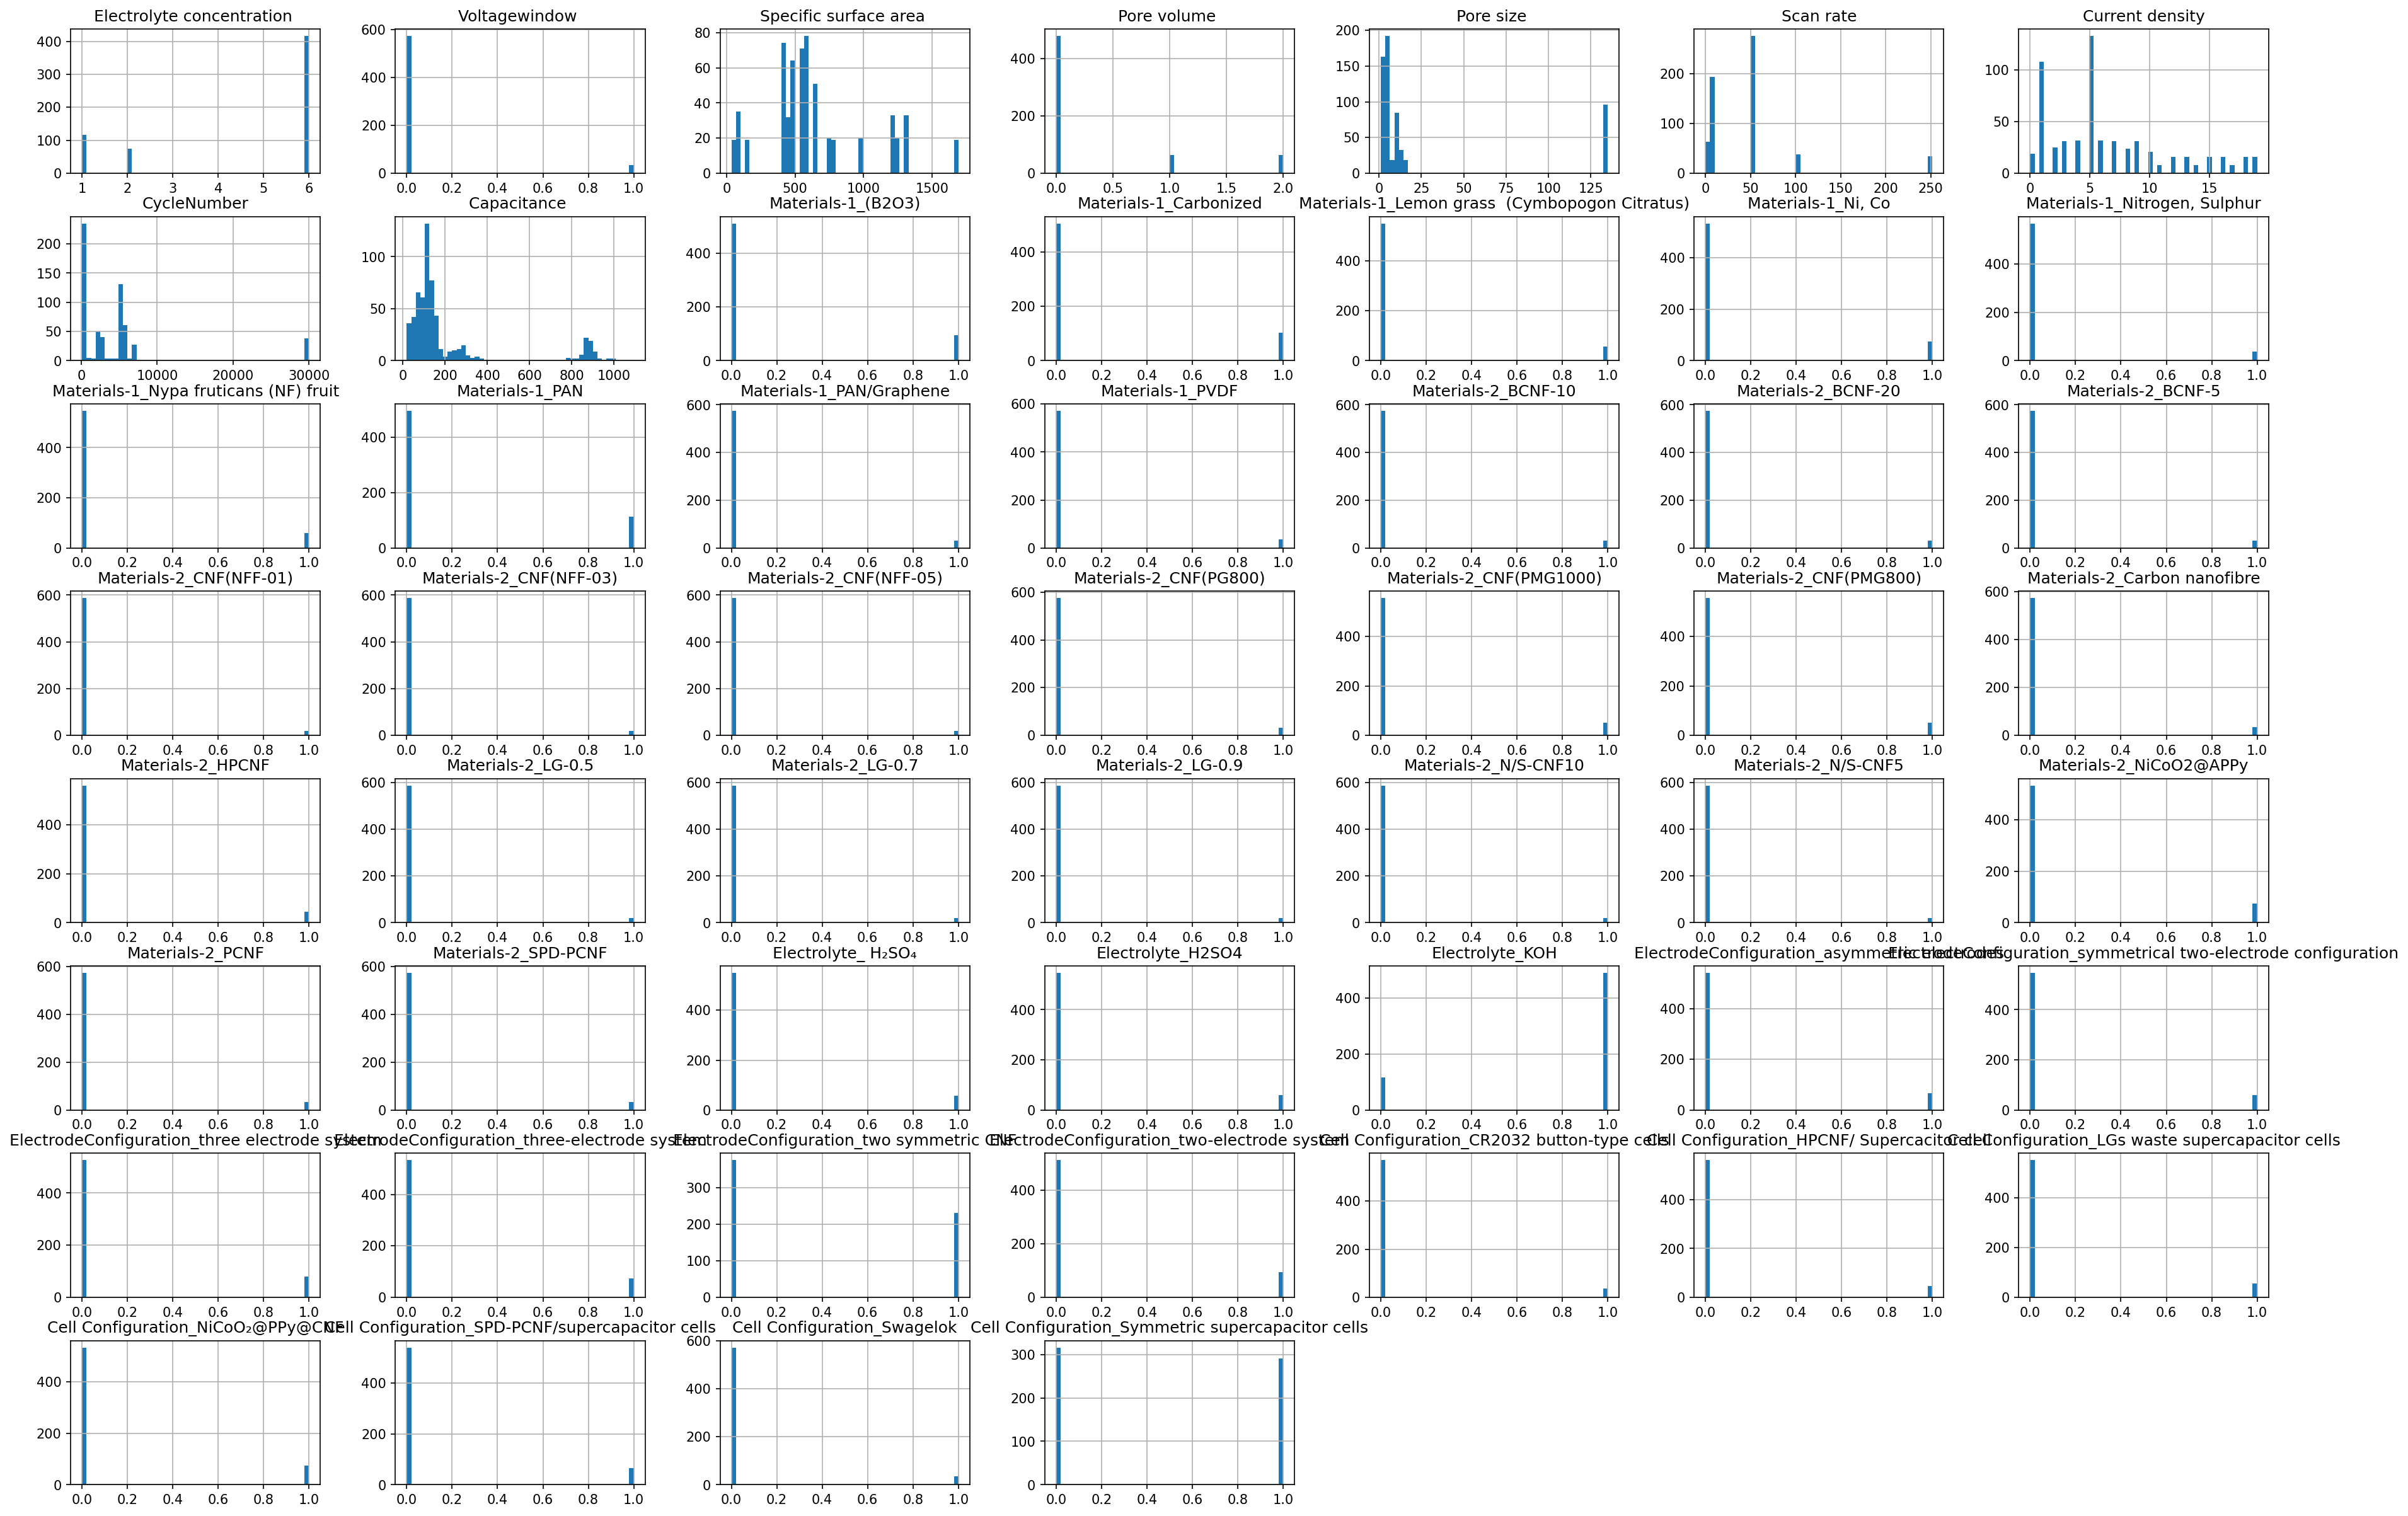

In [36]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30, 20), dpi=150)
df.hist(bins=50, figsize=(30, 20), ax=fig.gca())
plt.xticks(rotation=45, ha='right')
plt.show()

In [37]:
from sklearn.preprocessing import StandardScaler
X_train.columns = X_train.columns.str.strip()
X_test.columns = X_test.columns.str.strip()
columns_to_scale = ['Electrolyte concentration', 'Voltagewindow', 'Specific surface area',
                    'Pore volume', 'Pore size', 'Scan rate', 'Current density', 'CycleNumber']
sc = StandardScaler()
X_train[columns_to_scale] = sc.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = sc.transform(X_test[columns_to_scale])

X_train.head()



,Electrolyte concentration,Voltagewindow,Specific surface area,Pore volume,Pore size,Scan rate,Current density,CycleNumber,Materials-1_(B2O3),Materials-1_Carbonized,...,ElectrodeConfiguration_three-electrode system,ElectrodeConfiguration_two symmetric CNF,ElectrodeConfiguration_two-electrode system,Cell Configuration_CR2032 button-type cells,Cell Configuration_HPCNF/ Supercacitor cell,Cell Configuration_LGs waste supercapacitor cells,Cell Configuration_NiCoO₂@PPy@CNF,Cell Configuration_SPD-PCNF/supercapacitor cells,Cell Configuration_Swagelok,Cell Configuration_Symmetric supercapacitor cells
172,0.679797,-0.247526,-0.503691,1.044398,2.294379,0.094461,-0.873041,-0.611717,1,0,...,0,1,0,0,0,0,0,0,0,1
257,0.679797,-0.247526,-0.166359,2.574709,2.294379,0.094461,1.708818,-0.611717,1,0,...,0,1,0,0,0,0,0,0,0,1
326,0.679797,-0.247526,1.525658,-0.485913,-0.350498,-0.684095,-1.270250,0.078073,0,0,...,0,0,0,0,0,0,0,1,0,0
195,0.679797,-0.247526,-0.503691,1.044398,2.294379,0.094461,1.907422,-0.611717,1,0,...,0,1,0,0,0,0,0,0,0,1
546,-1.164688,-0.247526,-0.562591,-0.485913,-0.435134,-0.684095,-0.277227,0.300495,0,0,...,1,0,0,0,0,0,1,0,0,0


In [38]:

X_test

,Electrolyte concentration,Voltagewindow,Specific surface area,Pore volume,Pore size,Scan rate,Current density,CycleNumber,Materials-1_(B2O3),Materials-1_Carbonized,...,ElectrodeConfiguration_three-electrode system,ElectrodeConfiguration_two symmetric CNF,ElectrodeConfiguration_two-electrode system,Cell Configuration_CR2032 button-type cells,Cell Configuration_HPCNF/ Supercacitor cell,Cell Configuration_LGs waste supercapacitor cells,Cell Configuration_NiCoO₂@PPy@CNF,Cell Configuration_SPD-PCNF/supercapacitor cells,Cell Configuration_Swagelok,Cell Configuration_Symmetric supercapacitor cells
73,0.679797,-0.247526,0.021048,-0.485913,-0.435134,0.094461,-0.475832,-0.611717,0,1,...,0,1,0,0,0,0,0,0,0,1
74,0.679797,-0.247526,0.021048,-0.485913,-0.435134,0.094461,-0.277227,-0.611717,0,1,...,0,1,0,0,0,0,0,0,0,1
45,0.679797,-0.247526,-0.434083,-0.485913,-0.456293,0.094461,0.119982,-0.611717,0,0,...,0,1,0,0,0,0,0,0,0,1
271,-1.625809,-0.247526,0.334285,-0.485913,-0.519770,-0.805204,-0.277227,0.078073,0,0,...,0,0,0,0,0,0,0,0,0,1
196,0.679797,-0.247526,-0.503691,1.044398,2.294379,0.094461,1.907422,-0.611717,1,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,-1.625809,-0.247526,1.581880,-0.485913,-0.519770,-0.718698,-0.277227,0.078073,0,0,...,0,0,0,0,0,0,0,0,0,1
414,0.679797,-0.247526,-1.617424,-0.485913,-0.202385,0.959524,-0.873041,3.597406,0,0,...,0,0,1,1,0,0,0,0,0,0
335,0.679797,-0.247526,1.525658,-0.485913,-0.350498,-0.684095,-0.078623,0.078073,0,0,...,0,0,0,0,0,0,0,1,0,0
352,0.679797,-0.247526,1.525658,-0.485913,-0.350498,-0.684095,1.907422,0.078073,0,0,...,0,0,0,0,0,0,0,1,0,0


In [39]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
import matplotlib.pyplot as plt


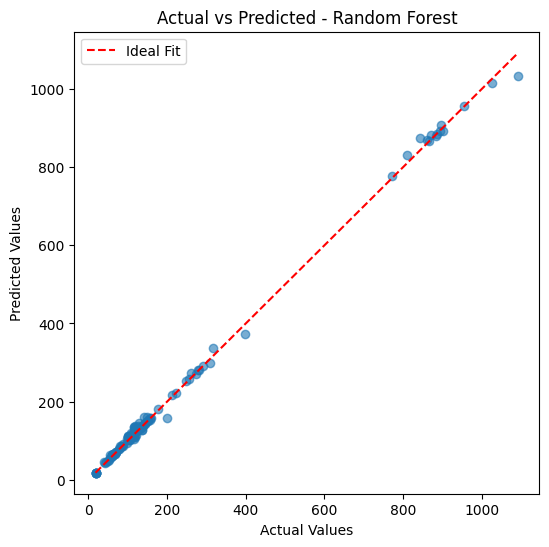

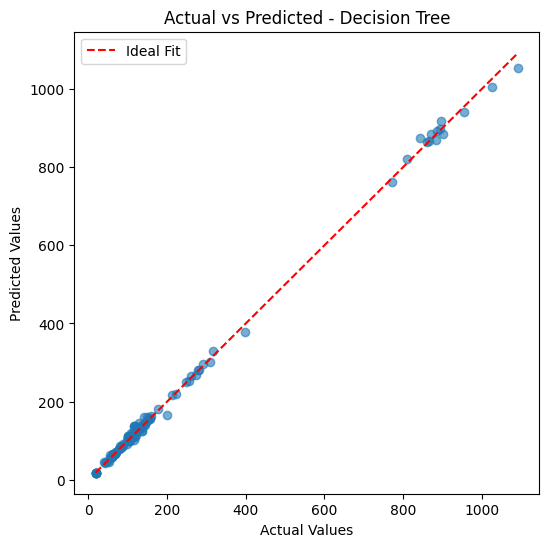

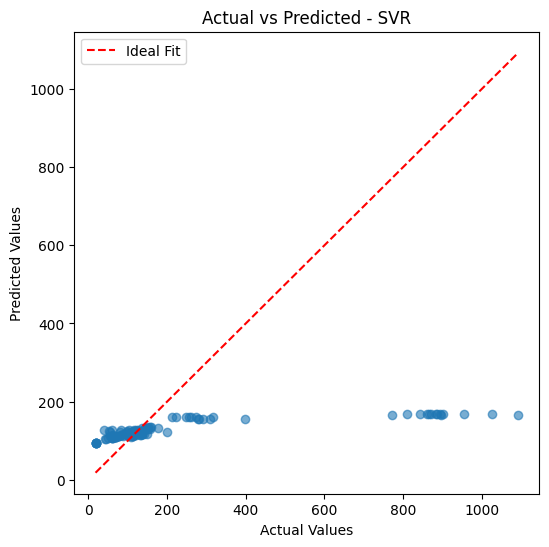

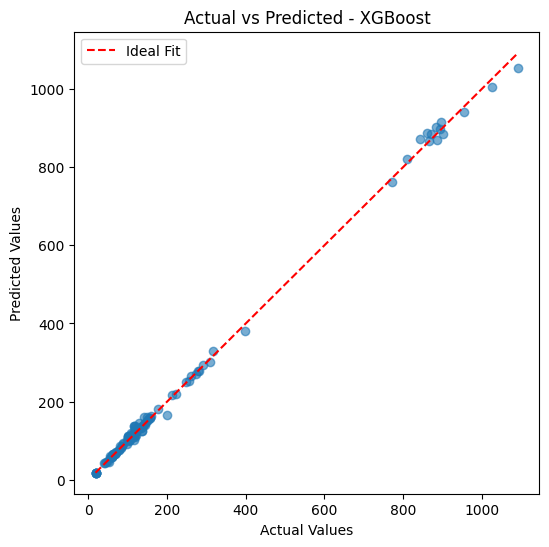

Model Evaluation Results:
           Model        RMSE        R2         MAE       EVS
0  Random Forest   10.112820  0.998464    5.683752  0.998502
1  Decision Tree    9.293085  0.998703    5.833228  0.998720
2            SVR  254.002323  0.030828  117.976305  0.129565
3        XGBoost    9.558948  0.998627    5.952570  0.998651


In [40]:
# Define a function to evaluate models
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    ema = mean_absolute_error(y_true, y_pred)
    evs = explained_variance_score(y_true, y_pred)
    return rmse, r2, ema, evs

# Function to create scatter plots
def scatter_plot(y_true, y_pred, model_name):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--', label='Ideal Fit')
    plt.title(f'Actual vs Predicted - {model_name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.show()

# Prepare results dataframe
results = pd.DataFrame(columns=['Model', 'RMSE', 'R2', 'MAE', 'EVS'])

# Models and their initialization
models = {
    'Random Forest': RandomForestRegressor(random_state=SEED),
    'Decision Tree': DecisionTreeRegressor(random_state=SEED),
    'SVR': SVR(),
    'XGBoost': XGBRegressor(random_state=SEED)
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, Y_train)

    # Predict on the test set
    Y_pred = model.predict(X_test)

    # Evaluate the model
    rmse, r2, ema, evs = evaluate_model(Y_test, Y_pred)
    # Append results as a new row using pd.concat
    new_row = pd.DataFrame([{'Model': model_name, 'RMSE': rmse, 'R2': r2, 'MAE': ema, 'EVS': evs}])
    results = pd.concat([results, new_row], ignore_index=True)


    # Scatter plot
    scatter_plot(Y_test, Y_pred, model_name)

# Display results
print("Model Evaluation Results:")
print(results)


In [41]:
features = list(X_train.columns)

In [42]:
features

['Electrolyte concentration',
 'Voltagewindow',
 'Specific surface area',
 'Pore volume',
 'Pore size',
 'Scan rate',
 'Current density',
 'CycleNumber',
 'Materials-1_(B2O3)',
 'Materials-1_Carbonized',
 'Materials-1_Lemon grass  (Cymbopogon Citratus)',
 'Materials-1_Ni, Co',
 'Materials-1_Nitrogen, Sulphur',
 'Materials-1_Nypa fruticans (NF) fruit',
 'Materials-1_PAN',
 'Materials-1_PAN/Graphene',
 'Materials-1_PVDF',
 'Materials-2_BCNF-10',
 'Materials-2_BCNF-20',
 'Materials-2_BCNF-5',
 'Materials-2_CNF(NFF-01)',
 'Materials-2_CNF(NFF-03)',
 'Materials-2_CNF(NFF-05)',
 'Materials-2_CNF(PG800)',
 'Materials-2_CNF(PMG1000)',
 'Materials-2_CNF(PMG800)',
 'Materials-2_Carbon nanofibre',
 'Materials-2_HPCNF',
 'Materials-2_LG-0.5',
 'Materials-2_LG-0.7',
 'Materials-2_LG-0.9',
 'Materials-2_N/S-CNF10',
 'Materials-2_N/S-CNF5',
 'Materials-2_NiCoO2@APPy',
 'Materials-2_PCNF',
 'Materials-2_SPD-PCNF',
 'Electrolyte_ H₂SO₄',
 'Electrolyte_H2SO4',
 'Electrolyte_KOH',
 'ElectrodeConfiguratio

In [43]:
RFR = RandomForestRegressor(random_state=SEED)

In [44]:
RFR.fit(X_train, Y_train)

RandomForestRegressor(random_state=23)

In [45]:
importance = RFR.feature_importances_
importance

array([9.07975755e-06, 1.03016149e-03, 1.30982678e-03, 1.87564917e-04,
       3.50858166e-03, 4.91499610e-03, 5.56642335e-03, 5.55931280e-04,
       9.71502490e-06, 3.72654081e-05, 1.37084595e-05, 1.86991861e-01,
       2.10992741e-05, 1.66923863e-02, 4.10206582e-05, 2.22233473e-05,
       1.27819910e-03, 3.11702145e-05, 4.53327874e-04, 3.36087355e-04,
       3.99409546e-04, 5.87363059e-05, 4.18378708e-05, 8.83594082e-06,
       3.58207875e-05, 1.00159125e-04, 1.64170001e-03, 3.86159631e-05,
       2.10546947e-05, 2.25161382e-05, 1.16813731e-04, 3.56584160e-05,
       6.58176216e-04, 2.23187774e-01, 2.79033981e-03, 1.54820067e-05,
       1.33585866e-05, 1.34285231e-02, 1.25332735e-05, 5.74692019e-06,
       1.15325380e-02, 5.18088034e-05, 2.97781108e-01, 3.90239450e-05,
       3.51781705e-05, 4.45828612e-05, 6.80060847e-05, 1.17045217e-05,
       2.23795389e-01, 1.19940737e-06, 9.59629342e-04, 3.61104554e-05])

In [46]:
FIM = pd.DataFrame({'features' : features, 'feature_importances' : importance})
FIM

,features,feature_importances
0,Electrolyte concentration,0.000009
1,Voltagewindow,0.001030
2,Specific surface area,0.001310
3,Pore volume,0.000188
4,Pore size,0.003509
5,Scan rate,0.004915
6,Current density,0.005566
7,CycleNumber,0.000556
8,Materials-1_(B2O3),0.000010
9,Materials-1_Carbonized,0.000037


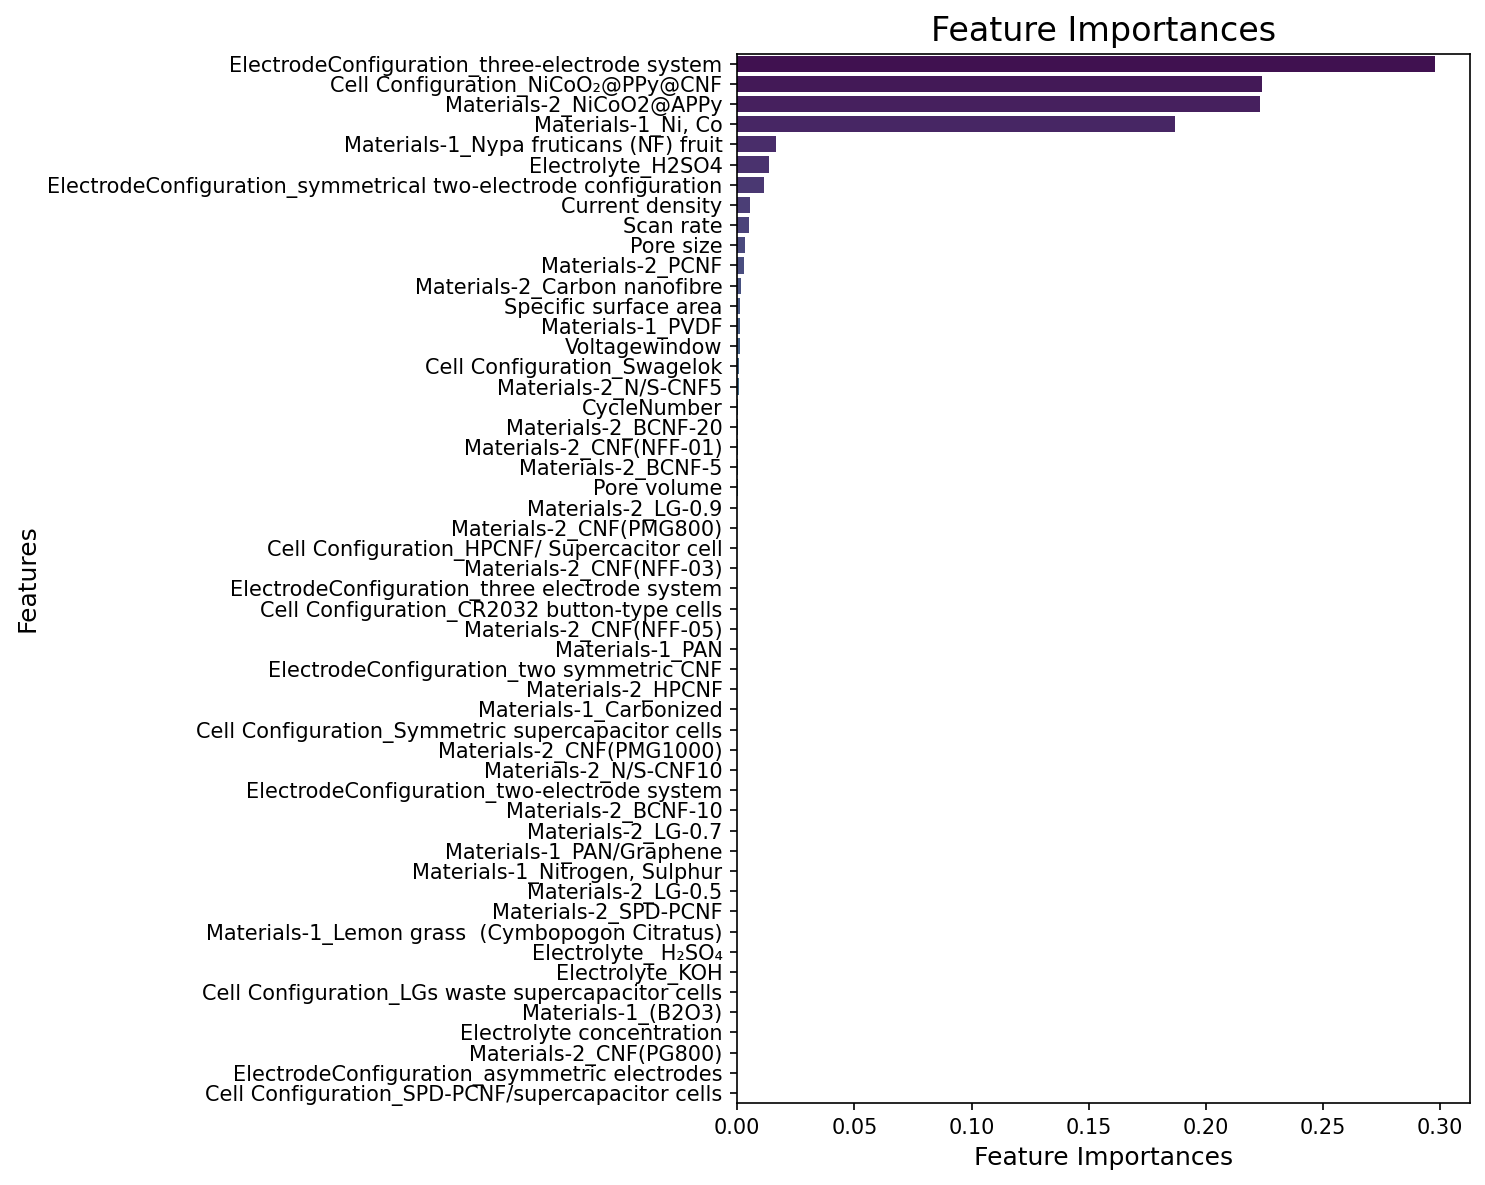

In [47]:

plt.figure(figsize=(10, 8), dpi=150)

# Sort feature importances for better visualization
FIM = FIM.sort_values(by="feature_importances", ascending=False)

# Create a barplot with improved label handling
sns.barplot(y='features', x='feature_importances', data=FIM, palette="viridis")

# Add titles and labels for better readability
plt.title('Feature Importances', fontsize=16)
plt.xlabel('Feature Importances', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adjust spacing if labels are still cluttered
plt.tight_layout()

# Display the plot
plt.show()


In [48]:
!pip install shap

In [50]:
import shap
X = df.drop(['Capacitance '],axis = 1)
explainer = shap.TreeExplainer(model,feature_perturbation="tree_path_dependent")
shap_values = explainer.shap_values(X)

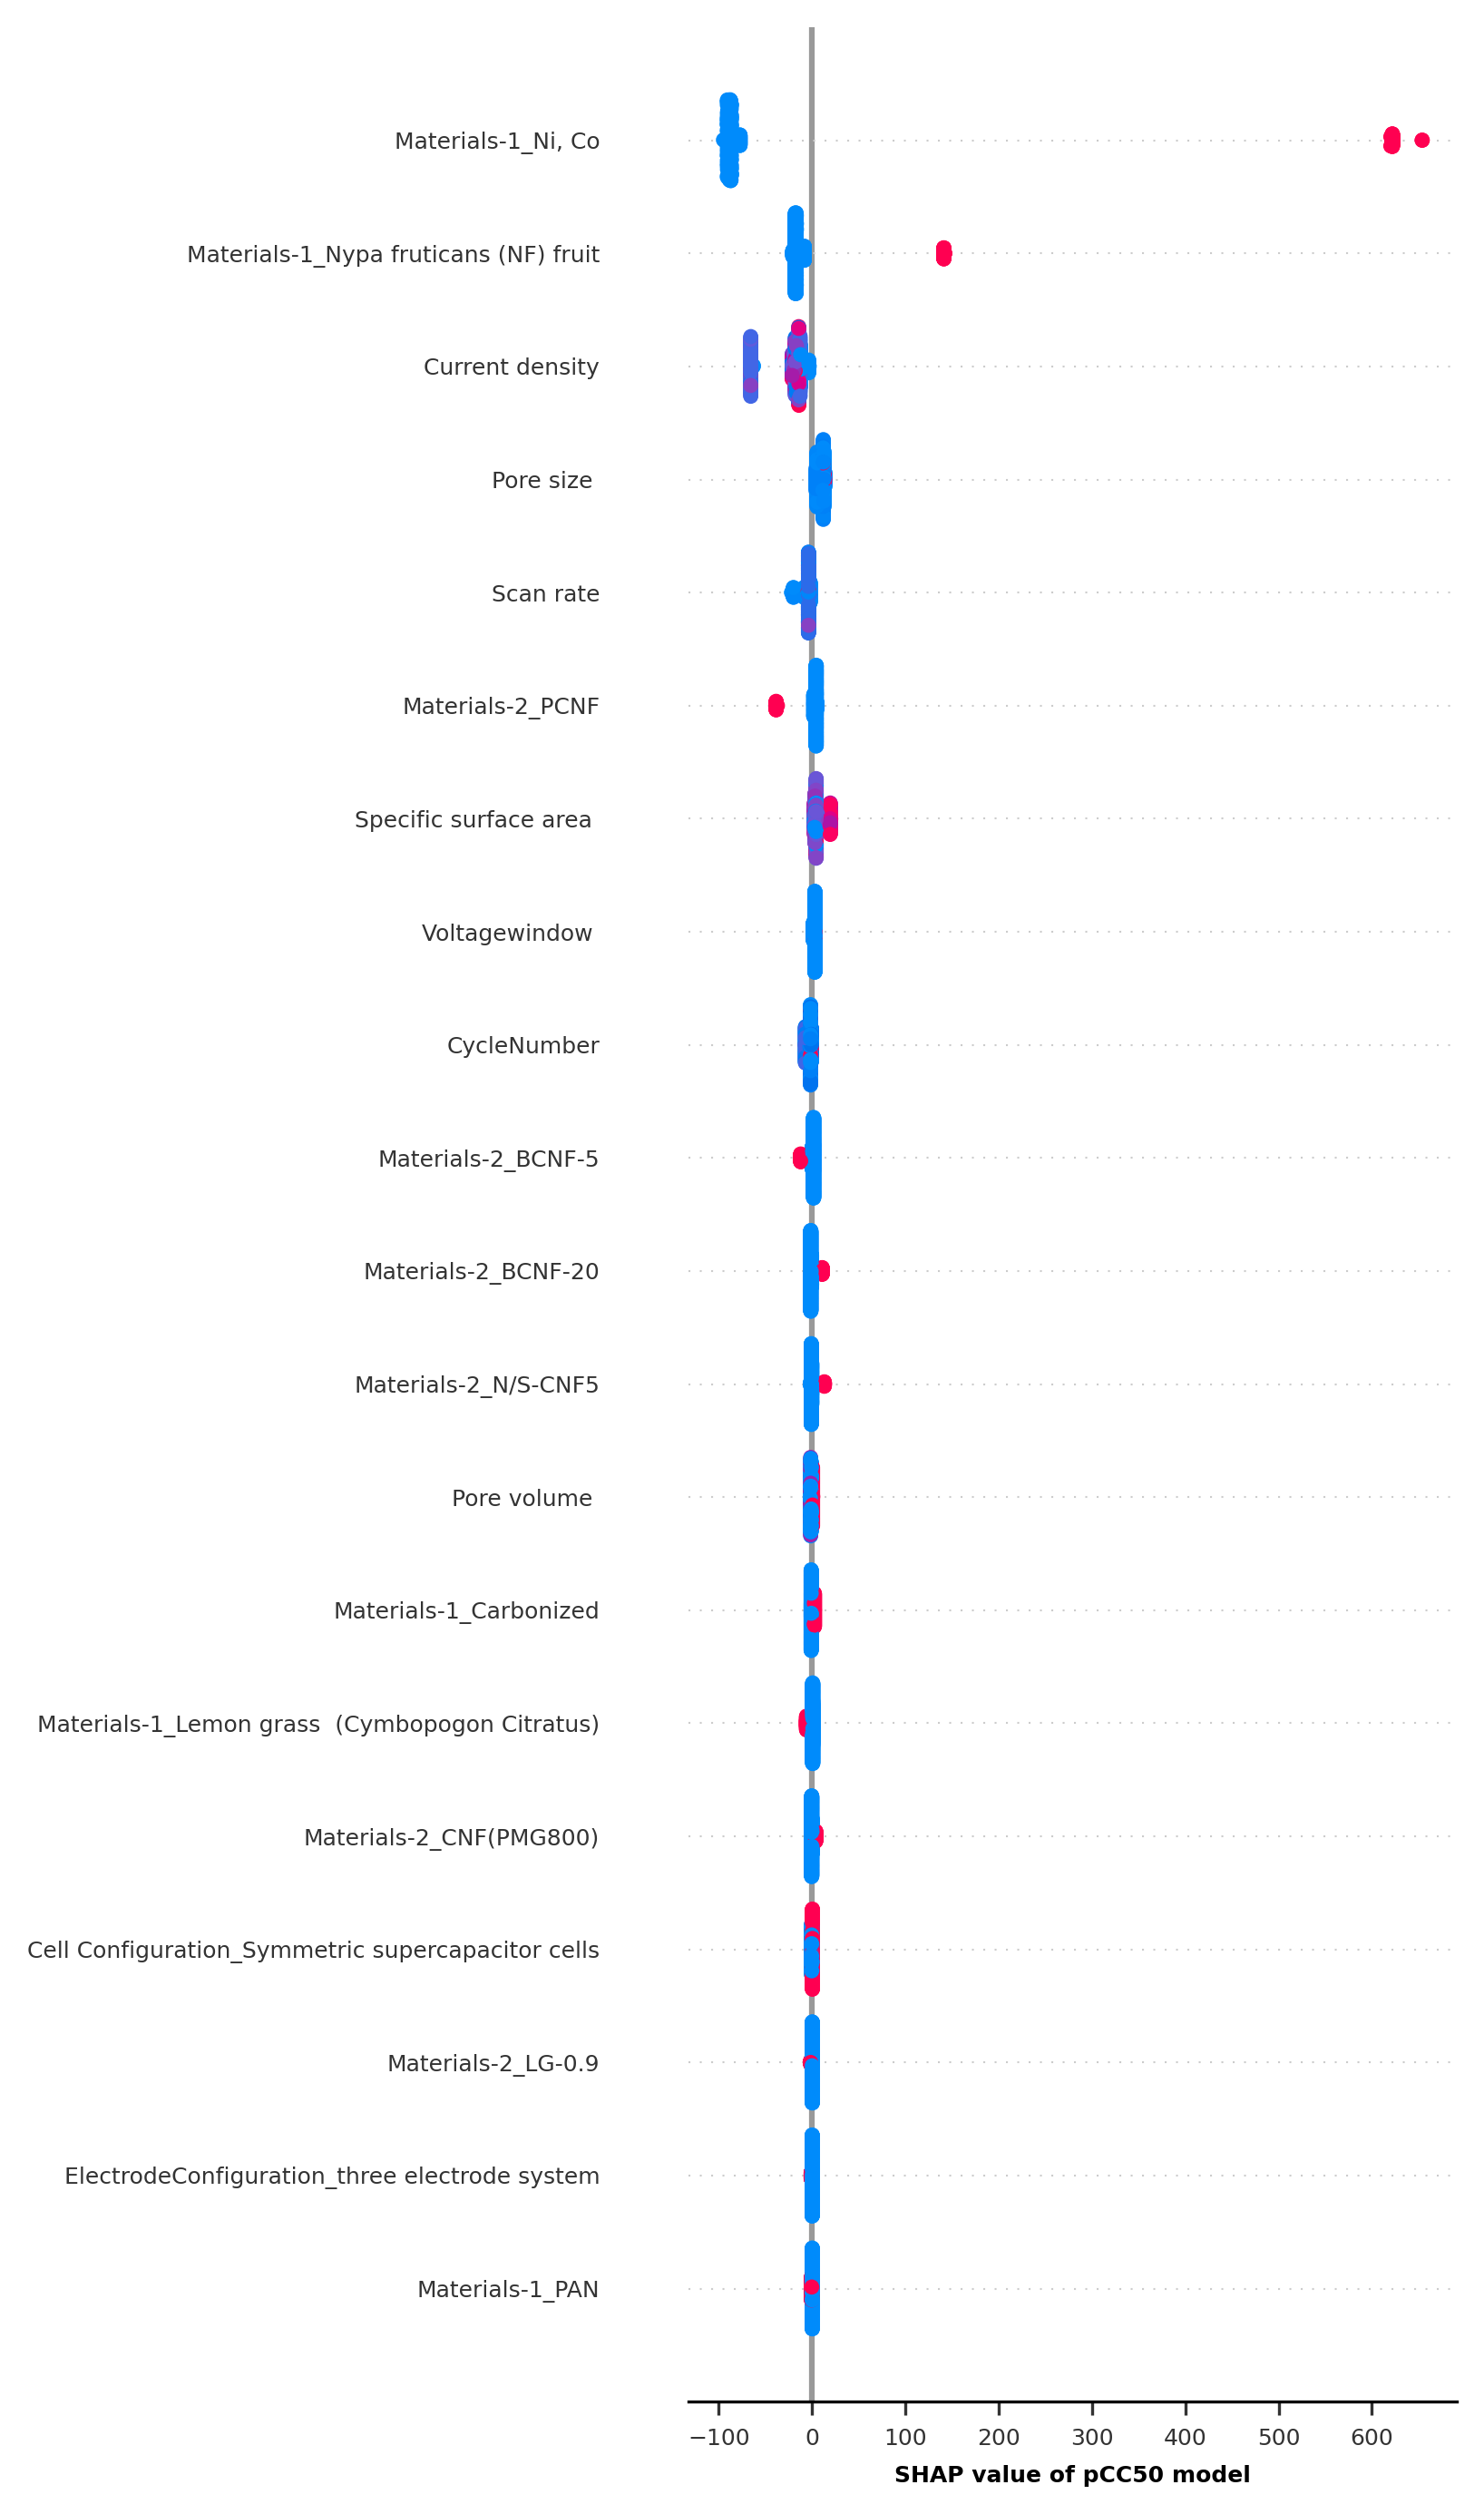

In [51]:
plt.figure(dpi=300)
shap.summary_plot(shap_values, X,show=False,color_bar=False)
plt.xlabel("SHAP value of pCC50 model" ,fontweight='bold',fontsize=6)
plt.tick_params(labelsize=6,)
plt.show()